<a href="https://colab.research.google.com/github/oxfordfictionary/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/S_Mazzuca_LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
# imports
import math
import numpy as np
import pandas as pd

In [0]:
# here's the list.
sales=[200, 350, 400, 550, 600, 600, 900]

In [15]:
# find the mean
total = sum(sales)
mean_sales = total/len(sales)
print("mean sales: ", mean_sales)

mean sales:  514.2857142857143


In [0]:
# Function

def mvstd(data):
  mean_data = sum(data)/len(data) # gets mean
  variance_data = sum((xi - mean_data)**2 for xi in data)/len(data) # gets variance
  mvstd_data = math.sqrt(variance_data) # gets standard deviation
  return mean_data, variance_data, mvstd_data

In [17]:
mvstd(sales)

(514.2857142857143, 43367.34693877551, 208.24828195876074)

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
#array for customers
customers = [127, 80, 105, 92, 120, 115, 93]

In [19]:
# covariance using numpy - I'm experimenting with python code formatting,
# please bear with me

print('{:.2f}'. #float to two decimals
      format(np.cov( #numpy covariance, will work on python lists
      sales, customers)[0][1])# setting lists into the covariance array format 
      ) 

-959.52


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [21]:
# std: calculated by using mean to get variance, then taking sqrt of variance
# xi is an iterative function for x, which takes the place of a function 
# 'for x in ___' 
total = sum(customers)
mean_customers = total/len(customers)
variance = sum((xi - mean_customers)**2 for xi in customers)/len(customers)
print("Variance: ", variance, "Square root: ", '{:.4}'.format(math.sqrt(variance)))

Variance:  249.3877551020408 Square root:  15.79


In [22]:
# checking work
print(variance, (np.sqrt(variance)))

249.3877551020408 15.792015549069118


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [23]:
#using bash command to get the data from url
!wget https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv

--2020-02-16 22:12:22--  https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 137509 (134K) [text/plain]
Saving to: ‘titanic_clean.csv’

titanic_clean.csv   100%[===================>] 134.29K  --.-KB/s    in 0.02s   

2020-02-16 22:12:22 (6.07 MB/s) - ‘titanic_clean.csv’ saved [137509/137509]



In [24]:
# reading in csv
df = pd.read_csv('titanic_clean.csv')
df.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [36]:
#find the numeric values
df.dtypes

Unnamed: 0            int64
pclass              float64
survived            float64
name                 object
sex                  object
age                 float64
sibsp               float64
parch               float64
ticket               object
fare                float64
cabin                object
embarked             object
boat                 object
body                float64
home.dest            object
has_cabin_number      int64
dtype: object

In [0]:
# dropping non-floats
df = df.drop(columns = ['name', 'sex', 'ticket', 'cabin', 'embarked', 'boat', 'home.dest'])

In [57]:
# checking my work
df.head()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
0,1,1.0,1.0,29.0000,0.0,0.0,211.3375,NaN,1
1,2,1.0,1.0,0.9167,1.0,2.0,151.5500,NaN,1
2,3,1.0,0.0,2.0000,1.0,2.0,151.5500,NaN,1
3,4,1.0,0.0,30.0000,1.0,2.0,151.5500,135.0,1
4,5,1.0,0.0,25.0000,1.0,2.0,151.5500,NaN,1


In [58]:
# covariance matrix
df.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [59]:
# correlation matrix
df.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

In [0]:
# orthogonal = perpendicular
# import
import matplotlib.pyplot as plt
# this allows us to show plots without plot() function
%matplotlib inline 

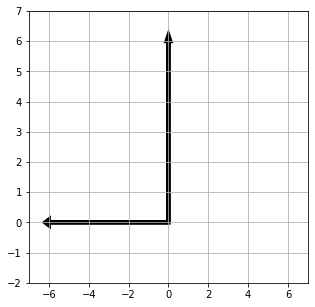

In [26]:
orth1 = np.array([0, 6])
orth2 = np.array([-6, -0])

fig, ax = plt.subplots(figsize=(5, 5))
ax.grid()
plt.xlim(-7, 7)          
plt.ylim(-2, 7)

# Plot the vectors
for vect in [orth1, orth2]:
    plt.arrow(0,0, vect[0], vect[1], head_width=.2, head_length=0.2, linewidth=4)
plt.show()

In [27]:
#checking orthagonality via dot method-- 0 means it's orthogonal
np.dot(orth1, orth2)

0

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
a = ([[-5], [3], [7]])
b = ([[6], [-8], [2]])

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
c = np.array([2, -15, 6, 20])

In [51]:
# absolute value of c^2
np.power(c, 2).sum()

665

In [46]:
# c * c
np.dot(c, c)

665

In [50]:
# C^T * c
ct = c.T
np.dot(ct, c)

665

In [0]:
# Their total value is all the same!

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

$$e = 2\hat{i} + 11\hat{j} -8\hat{k}$$

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [0]:
#copying array
f = np.array([4, 12, 11, 9, 2])

In [39]:
#find the length
norm_f = np.linalg.norm(f)
# making formatting for 4 decimals
print ('{:.4}'.format(norm_f))

19.13


In [40]:
#find unit vector, x in data / length
f_hat = f/np.linalg.norm(f)
print(f_hat)

[0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]


In [41]:
# get length of the above series
f_hat_norm = np.linalg.norm(f_hat)
print(f_hat_norm)

0.9999999999999999


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

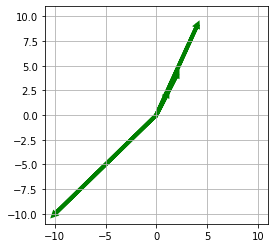

In [79]:
# setting my arrays, 1st two are dependent, 2nd two independent
line1 = np.array([1, 2])
line2 = np.array ([2, 4])

line3 = np.array([-10, -10])
line4 = np.array([4, 9])

fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-11,11)          
plt.ylim(-11,11)

# Display
for myvect in [line1, line2, line3, line4]: # variables above
    plt.arrow(0,0,
              myvect[0], 
              myvect[1], 
              head_width=.2, 
              head_length=0.2, 
              linewidth=4, 
              color='green')

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
# coding in arrays above
g = np.array([1, 2])
h = np.array([4, 8])

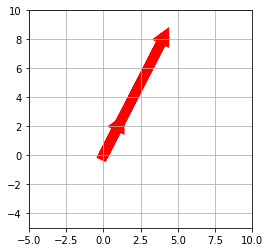

In [61]:
# Plot them on a grid
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-5,10)          
plt.ylim(-5,10)

# Display
for myvect in [g, h]: # variables above
    plt.arrow(0,0,
              myvect[0], 
              myvect[1], 
              head_width=.2, 
              head_length=0.2, 
              linewidth=10, 
              color='red')


In [62]:
# getting another value for these vectors
a,b=(2,3)
linear_combo= np.multiply(g, a) + np.multiply(h, b) 
print(linear_combo)

[14 28]


In [0]:
#finding additional values
additional=[]
for (a,b) in [(2,3), (4,5), (6,7), (8,9)]:
    linear_combo = np.multiply(g, a) + np.multiply(h, b) 
    additional.append(linear_combo)
#though in this case I don't need to-- I can see the span of this is 1

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
# coding in arrays
t = np.array([1, 2, 3])
m = np.array([-1, 0 -7])
n = np.array([4, 8, 2])

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



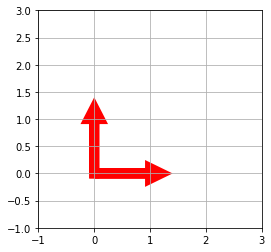

In [83]:
r1 = np.array([0,1])
r2 = np.array([1,0])

fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-1,3)          
plt.ylim(-1,3)

# Display
for myvect in [r1, r2]: # variables above
    plt.arrow(0,0,
              myvect[0], 
              myvect[1], 
              head_width=.2, 
              head_length=0.2, 
              linewidth=10, 
              color='red')

## 6.2 What does it mean to form a basis?

from lecture
''' In 2-dimensional space $\mathbb{R}^2$, ANY vector (a,b) can be decomposed as the linear combination of the basis vectors (1,0) and (0,1). Since these are unit vectors, they are called "orthonormal basis".'''
 
 
 in plain English, this basically means breaking x and y coordinates down the point
 at which they are 0 in terms of the other units
to me it's reminiscent of the old m(x) + b format in linear algebra in school,
where y can be found when x is 0

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [84]:
P = np.array([[1, 2, 3],
             [-1, 0, 7],
             [4, 8, 2]])
np.linalg.matrix_rank(np.array(P))

3

## 7.2 What does the rank of a matrix tell us?

the number of dimensions that are spanned by a given matrix, found by reducing it to row-echelon form (removing all linearly-dependent vectors from the matrix which reduces it to a simpler form).


# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [0]:
# arrays
v = np.array([1, 3])
w = np.array([-1, 2])

In [0]:
# Finding dot product
w_dot_v = np.dot(v, w)
v_dot_v = np.dot(v, v)

In [92]:
# projection
fraction = w_dot_v/v_dot_v
projection = np.multiply(fraction,v)
print(projection)

[0.5 1.5]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


TypeError: ignored

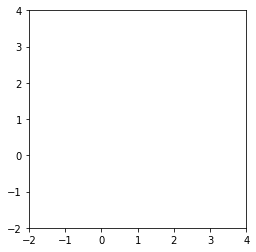

In [94]:


# Get Vals for L
# Axis Bounds
plt.xlim(-2,4)          
plt.ylim(-2,4)

# Set axes
axes = plt.gca()
plt.axes().set_aspect('equal')

# Plot Vectors and L
x_vals = np.array(axes.get_xlim(v))
y_vals = 3*x_vals

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

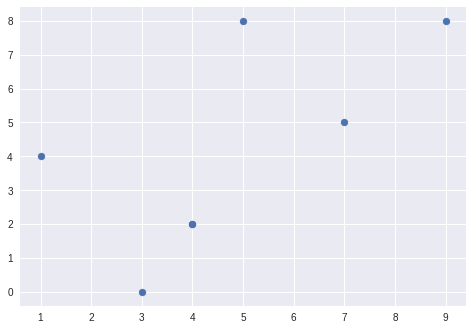

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()